In [1]:
#Importing all the required library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/Auto_Insurance_Claims_amount.csv')
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 26)

In [5]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [7]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies'],
       dtype='object'),
 dtype('float64'): Index(['Claim Amount', 'Total Claim Amount'], dtype='object'),
 dtype('O'): Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
        'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type', 'Policy',
        'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
       dtype='object')}

In [9]:
#Finding unique observations from the data frame using nunique()
df.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [10]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [11]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [12]:
#checking the correlation
dfcor=df.corr()

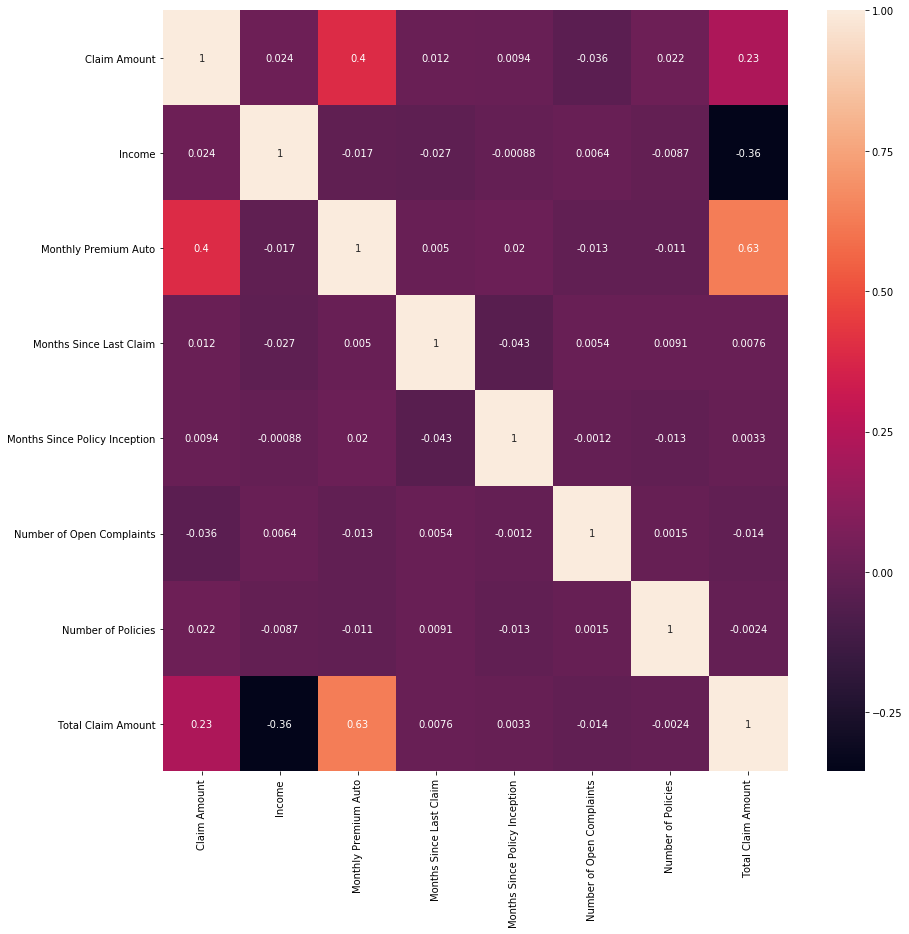

In [13]:
plt.figure(figsize=(14,14))
sns.heatmap(dfcor,annot=True)
plt.show()

In [14]:
#We can group both int and float
df_int=df.select_dtypes(include=[np.number])

In [15]:
df_int.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,32,5,0,1,384.811147
1,697.953590,0,94,13,42,0,8,1131.464935
2,1288.743165,48767,108,18,38,0,2,566.472247
3,764.586183,0,106,18,65,0,7,529.881344
4,281.369258,43836,73,12,44,0,1,138.130879


In [16]:
#Checking the skewness

df_int.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

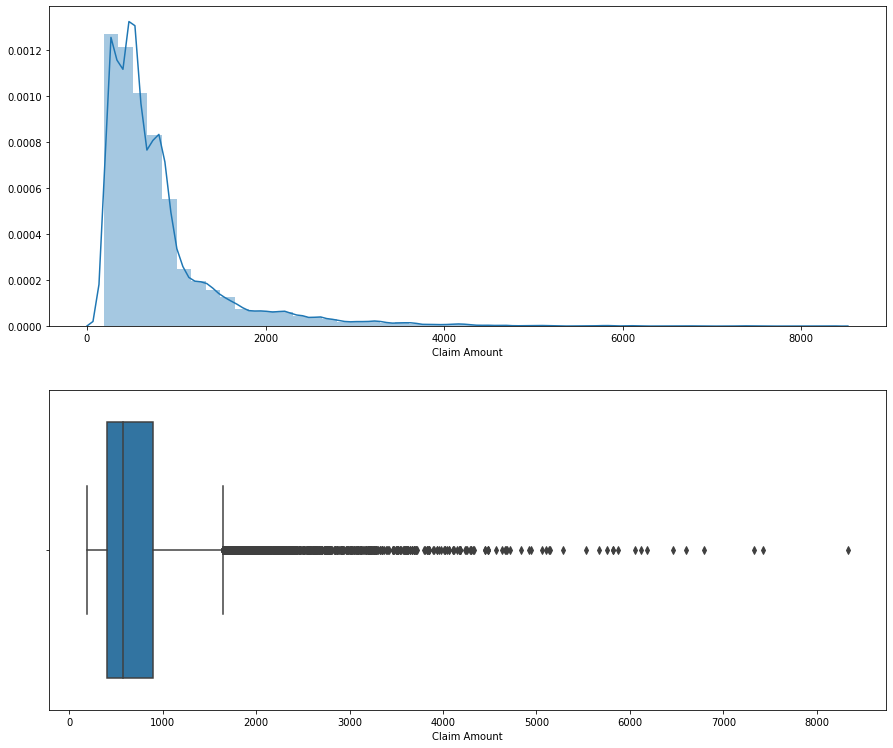

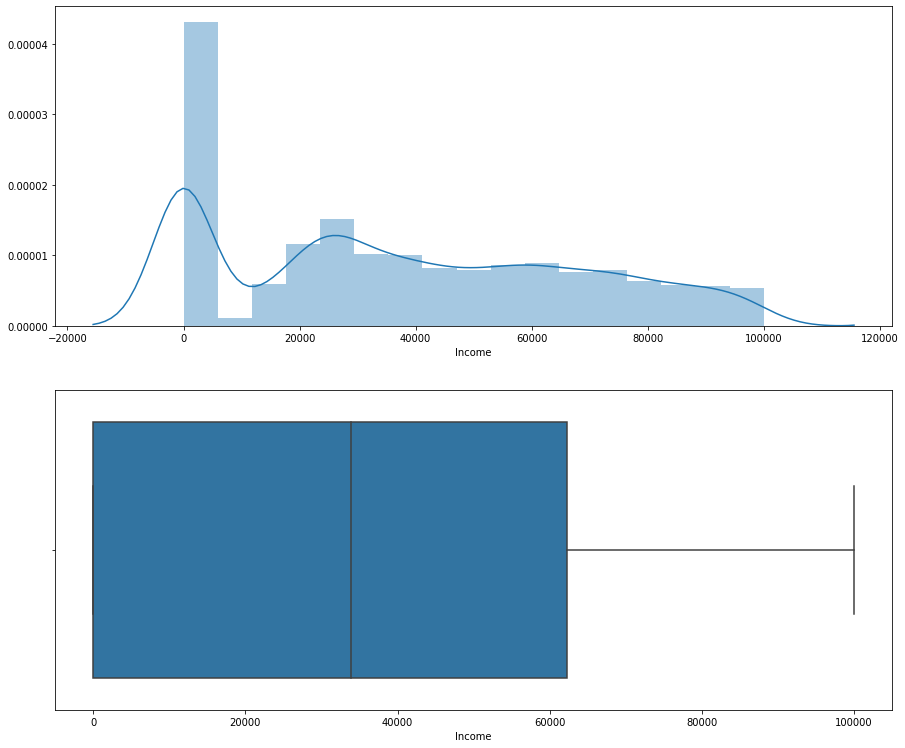

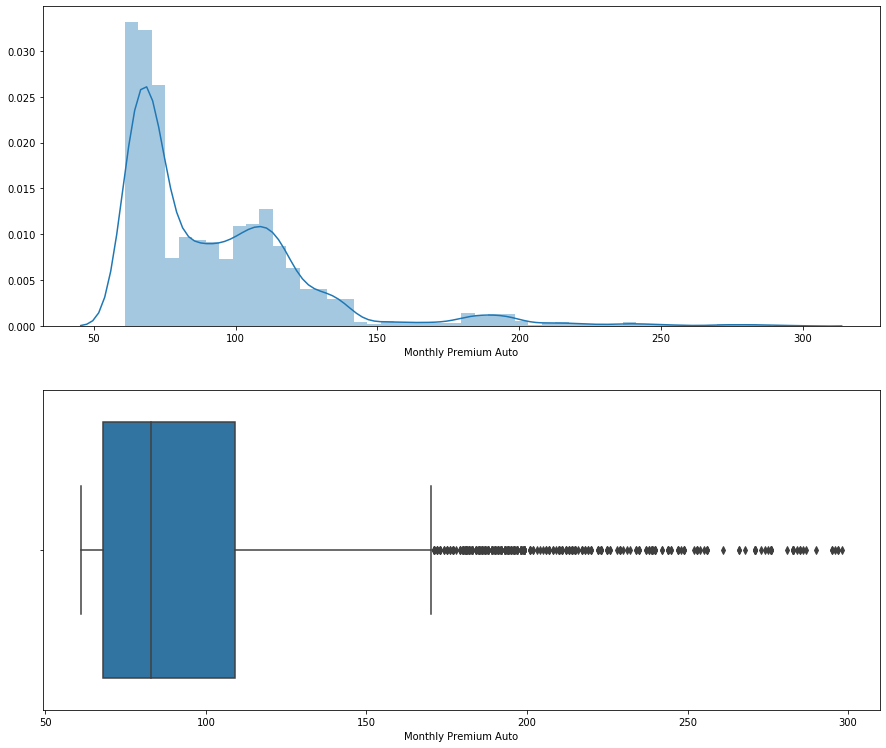

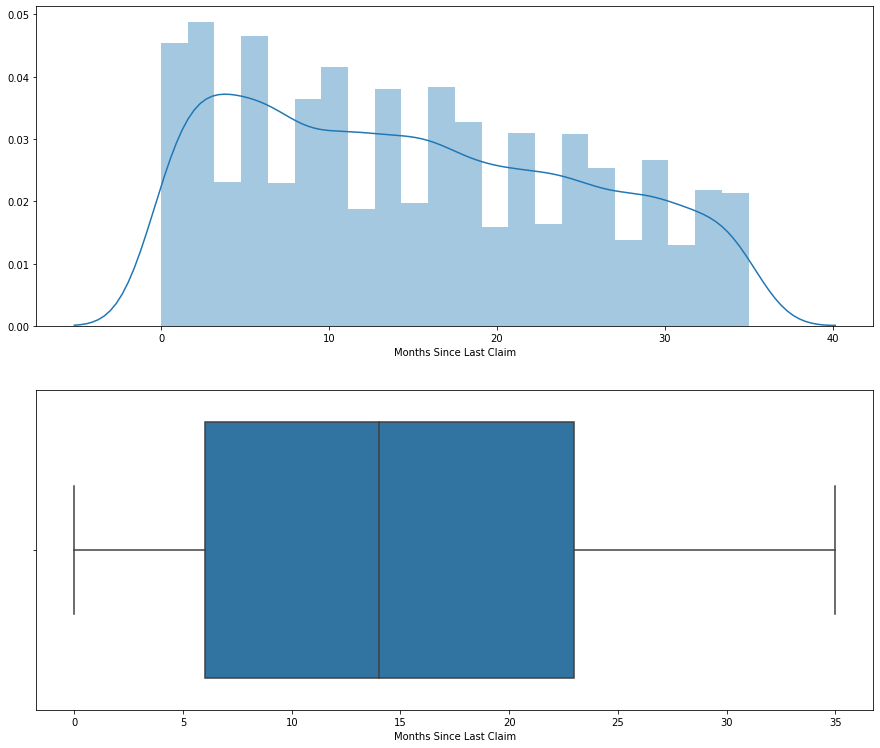

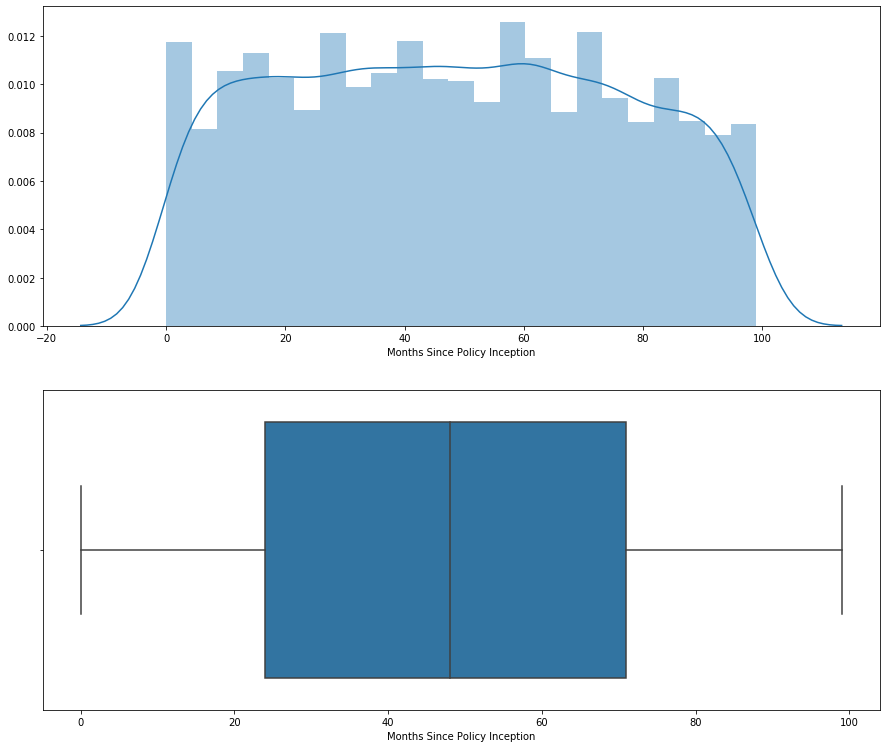

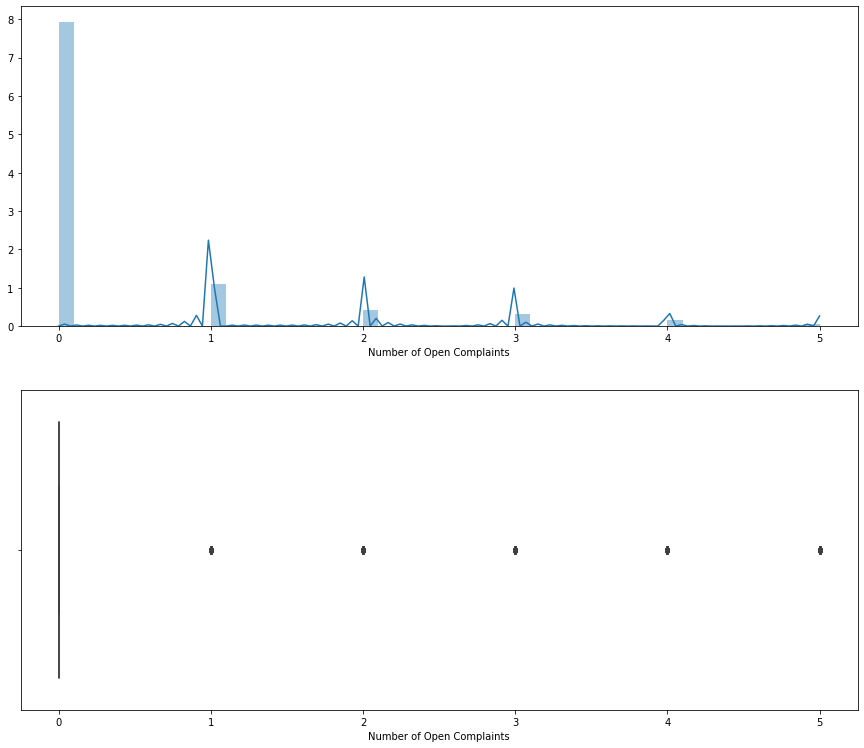

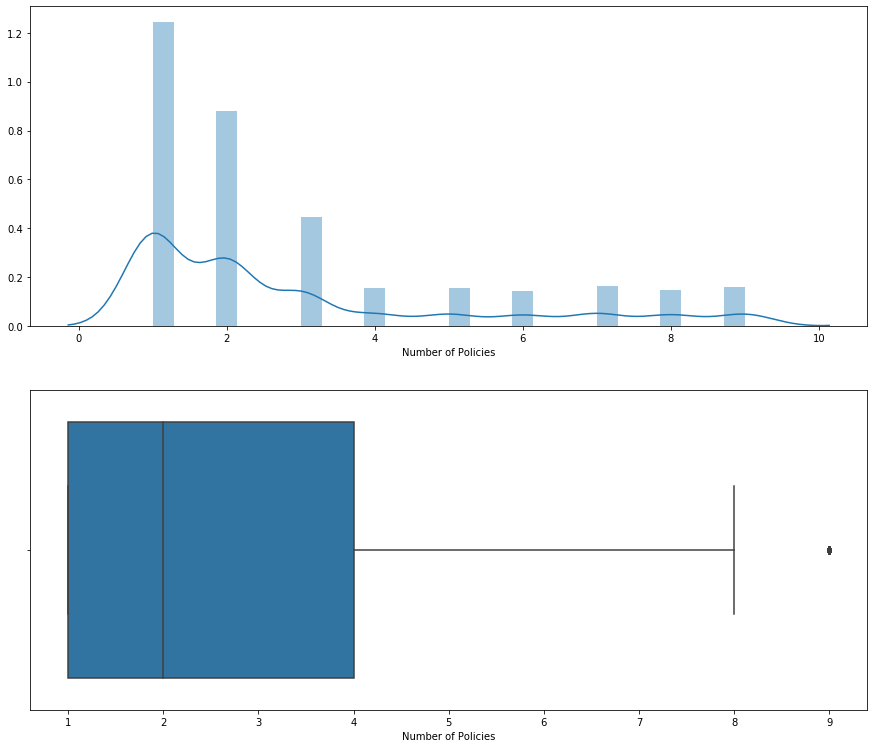

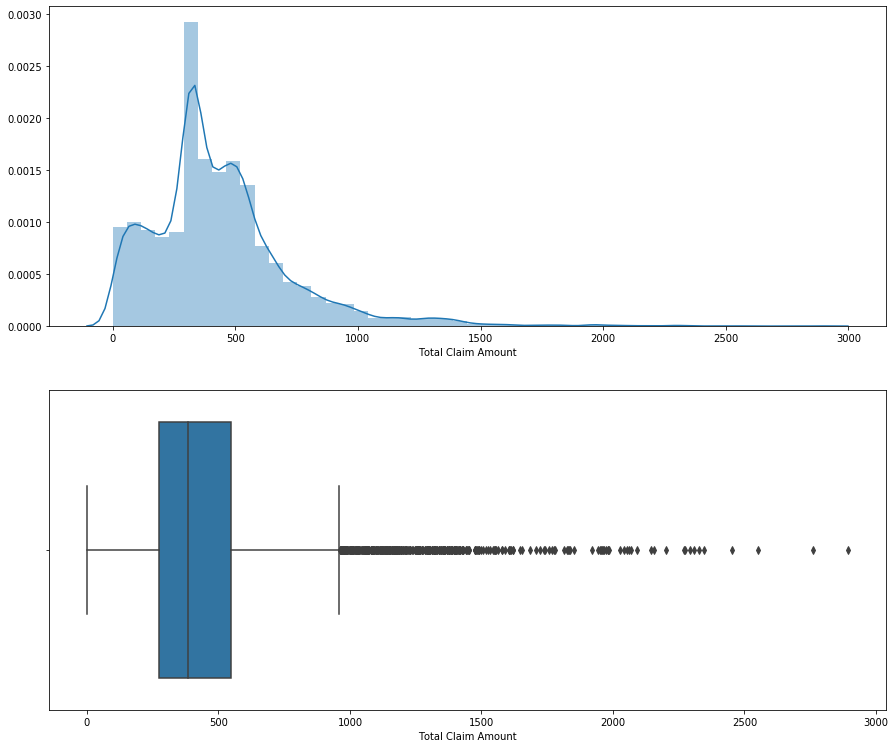

In [17]:
for i in df_int:
    plt.figure(figsize=(15,20))
    plt.subplot(311)
    sns.distplot(df_int[i])
    plt.subplot(312)
    sns.boxplot(df_int[i])

In [18]:
df_int['Income']=df_int['Income']+100

In [19]:
from scipy.stats import boxcox
df_int['Claim Amount']=boxcox(df_int['Claim Amount'],0)
df_int['Monthly Premium Auto']=boxcox(df_int['Monthly Premium Auto'],0)
df_int['Total Claim Amount']=boxcox(df_int['Total Claim Amount'],0.5)
df_int['Income']=boxcox(df_int['Income'],0)

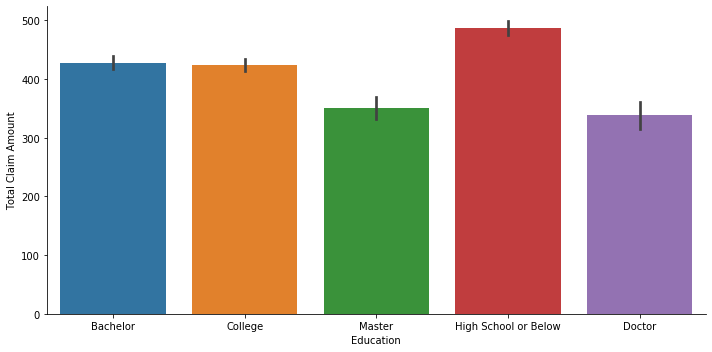

In [20]:
sns.catplot(x='Education',y='Total Claim Amount',data=df,kind='bar',aspect=2)
plt.show()

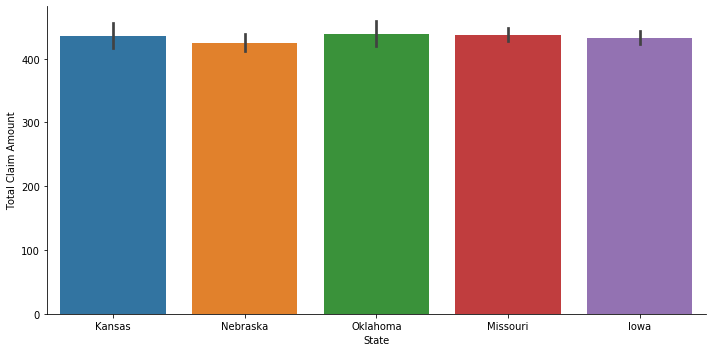

In [21]:
sns.catplot(x='State',y='Total Claim Amount',data=df,kind='bar',aspect=2)
plt.show()

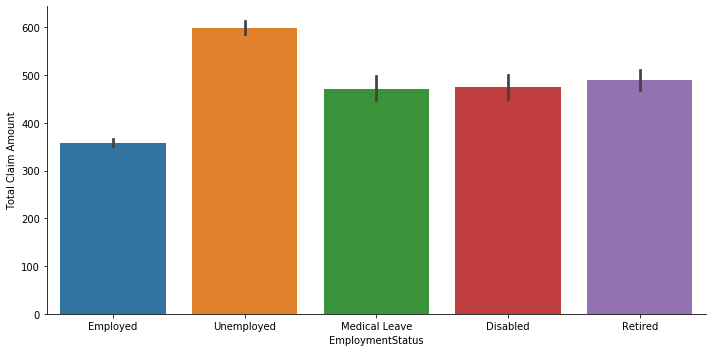

In [22]:
sns.catplot(x='EmploymentStatus',y='Total Claim Amount',data=df,kind='bar',aspect=2)
plt.show()

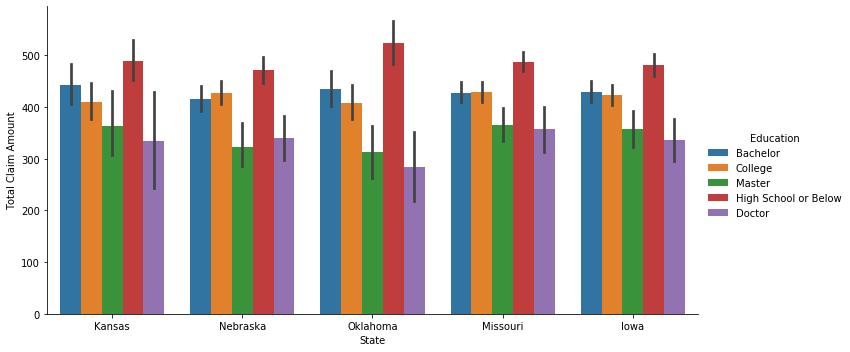

In [23]:
sns.catplot(x='State',y='Total Claim Amount',hue='Education',data=df,kind='bar',aspect=2)
plt.show()

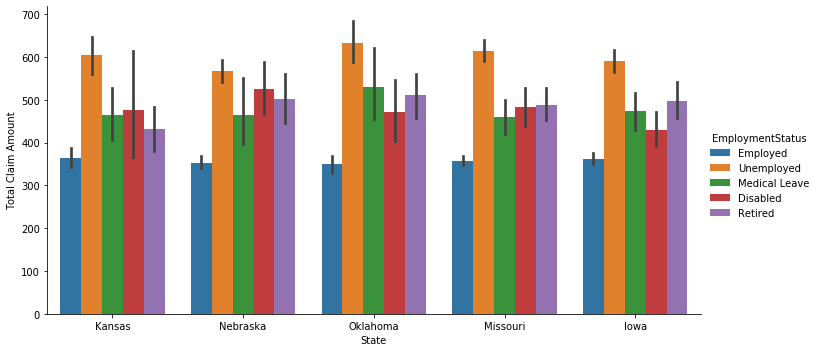

In [24]:
sns.catplot(x='State',y='Total Claim Amount',hue='EmploymentStatus',data=df,kind='bar',aspect=2)
plt.show()

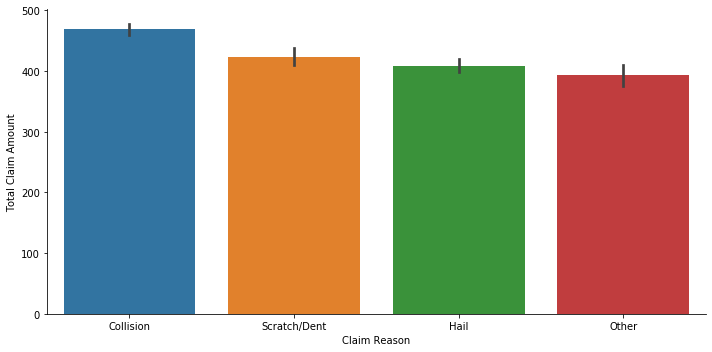

In [25]:
sns.catplot(x='Claim Reason',y='Total Claim Amount',data=df,kind='bar',aspect=2)
plt.show()

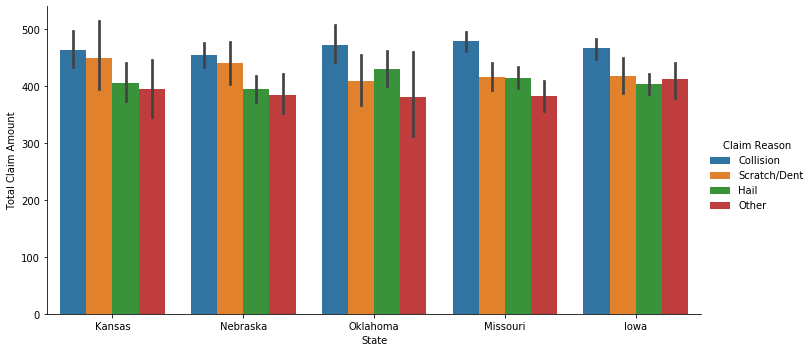

In [26]:
sns.catplot(x='State',y='Total Claim Amount',hue='Claim Reason',data=df,kind='bar',aspect=2)
plt.show()

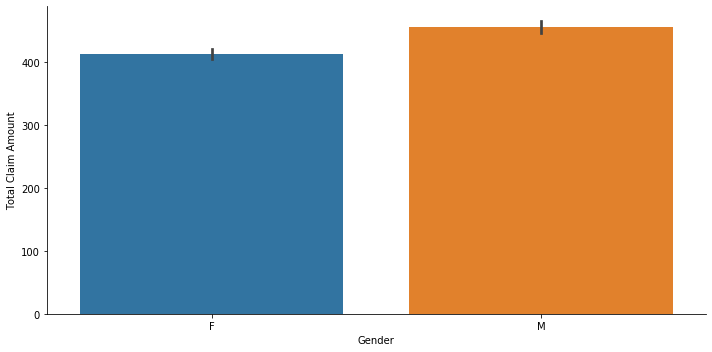

In [27]:
sns.catplot(x='Gender',y='Total Claim Amount',data=df,kind='bar',aspect=2)
plt.show()

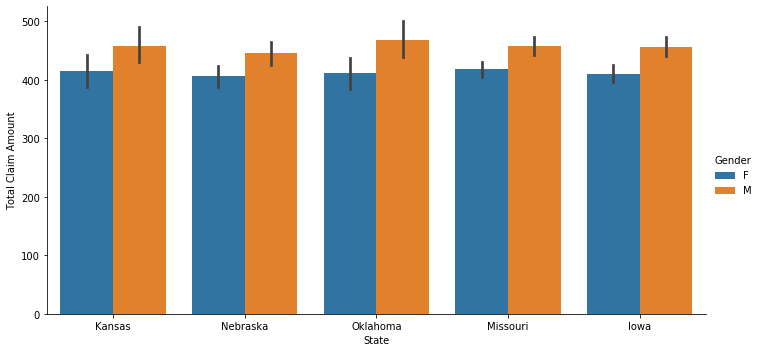

In [28]:
sns.catplot(x='State',y='Total Claim Amount',hue='Gender',data=df,kind='bar',aspect=2)
plt.show()

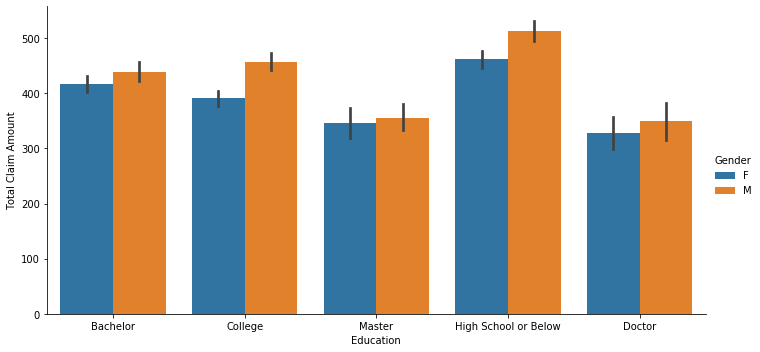

In [29]:
sns.catplot(x='Education',y='Total Claim Amount',hue='Gender',data=df,kind='bar',aspect=2)
plt.show()

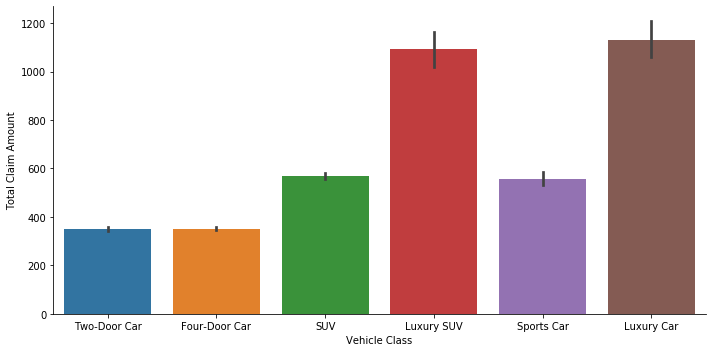

In [30]:
sns.catplot(x='Vehicle Class',y='Total Claim Amount',data=df,kind='bar',aspect=2)
plt.show()

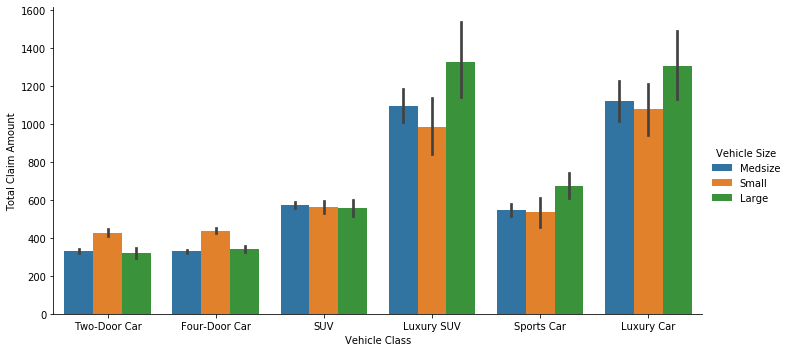

In [31]:
sns.catplot(x='Vehicle Class',y='Total Claim Amount',hue='Vehicle Size',data=df,kind='bar',aspect=2)
plt.show()

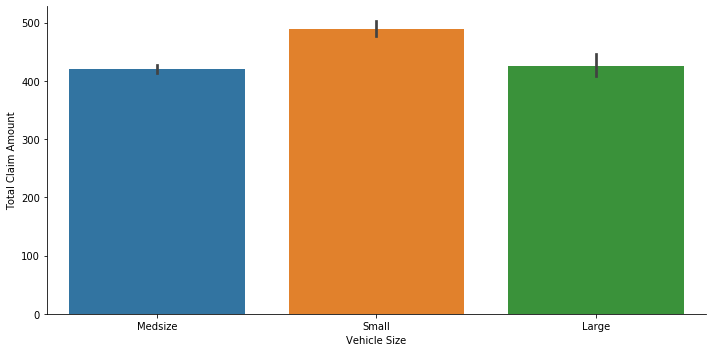

In [32]:
sns.catplot(x='Vehicle Size',y='Total Claim Amount',data=df,kind='bar',aspect=2)
plt.show()

In [33]:
df_object=df.select_dtypes(include=[np.object])

In [34]:
df_object.head()

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize
4,HB64268,US,KS,Kansas,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize


In [35]:
for i in df_object:
    print(i)
    print(df_object[i].nunique())

Customer
9134
Country
1
State Code
5
State
5
Response
2
Coverage
3
Education
5
Effective To Date
59
EmploymentStatus
5
Gender
2
Location Code
3
Marital Status
3
Policy Type
3
Policy
9
Claim Reason
4
Sales Channel
4
Vehicle Class
6
Vehicle Size
3


In [36]:
#For the columns customer and country column, we can drop both the columns

In [37]:
df_object.drop(['Customer'],axis=1,inplace=True)

In [38]:
df_object.drop(['Country'],axis=1,inplace=True)

In [39]:
#For the columns stated code and state

In [40]:
df_object['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [41]:
df_object['State'].value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [42]:
#As they both are giving same results we xan drop any one and we can label encode the other

In [43]:
df_object.drop(['State Code'],axis=1,inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_object['State']=le.fit_transform(df_object['State'])

In [45]:
#For Response, Education and coverage columns

In [46]:
df_object['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [47]:
df_object['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [48]:

df_object['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [49]:
df_object['Response']=le.fit_transform(df_object['Response'])
df_object['Education']=le.fit_transform(df_object['Education'])
df_object['Coverage']=le.fit_transform(df_object['Coverage'])


In [50]:
#Effective to Date column
df_object['Effective To Date'].value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
1/28/11    169
2/26/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/28/11    161
2/10/11    161
1/29/11    160
1/21/11    160
1/2/11     160
2/3/11     158
2/5/11     158
2/22/11    158
2/7/11     157
2/12/11    156
1/23/11    155
1/18/11    154
2/1/11     154
1/15/11    153
1/14/11    152
2/11/11    151
1/25/11    151
1/7/11     151
2/18/11    149
2/25/11    149
2/2/11     149
1/8/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: Effective To Date, dtype: int64

In [51]:
df_object['Effective To Day']=df_object['Effective To Date'].str.split('/').str[0].astype(int)
df_object['Effective To Month']=df_object['Effective To Date'].str.split('/').str[1].astype(int)

In [52]:
df_object.drop(['Effective To Date'],axis=1,inplace=True)

In [53]:
#Employment Status
df_object['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [54]:
df_object['EmploymentStatus']=le.fit_transform(df_object['EmploymentStatus'])

In [55]:
#Gender
df_object['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [56]:
df_object['Gender']=le.fit_transform(df_object['Gender'])

In [57]:
#For the other columns

In [58]:
df_object['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [59]:
df_object['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [60]:
df_object['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [61]:
df_object['Policy'].value_counts()


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [62]:
df_object['Claim Reason'].value_counts()

Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim Reason, dtype: int64

In [63]:
df_object['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [64]:
df_object['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [65]:
df_object['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [66]:
df_object['Location Code']=le.fit_transform(df_object['Location Code'])
df_object['Marital Status']=le.fit_transform(df_object['Marital Status'])
df_object['Policy Type']=le.fit_transform(df_object['Policy Type'])
df_object['Policy']=le.fit_transform(df_object['Policy'])
df_object['Claim Reason']=le.fit_transform(df_object['Claim Reason'])
df_object['Sales Channel']=le.fit_transform(df_object['Sales Channel'])
df_object['Vehicle Class']=le.fit_transform(df_object['Vehicle Class'])
df_object['Vehicle Size']=le.fit_transform(df_object['Vehicle Size'])

In [67]:
df_object.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
State                 9134 non-null int32
Response              9134 non-null int32
Coverage              9134 non-null int32
Education             9134 non-null int32
EmploymentStatus      9134 non-null int32
Gender                9134 non-null int32
Location Code         9134 non-null int32
Marital Status        9134 non-null int32
Policy Type           9134 non-null int32
Policy                9134 non-null int32
Claim Reason          9134 non-null int32
Sales Channel         9134 non-null int32
Vehicle Class         9134 non-null int32
Vehicle Size          9134 non-null int32
Effective To Day      9134 non-null int32
Effective To Month    9134 non-null int32
dtypes: int32(16)
memory usage: 571.0 KB


In [68]:
#Merging two dataframe using concat function
df_new=pd.concat([df_int,df_object],axis=1)
df_new.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,...,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Effective To Day,Effective To Month
0,5.621675,10.939763,4.234107,32,5,0,1,37.233208,1,0,...,1,1,0,2,0,0,5,1,2,24
1,6.548153,4.605170,4.543295,13,42,0,8,65.274510,3,0,...,1,2,1,5,3,0,0,1,1,31
2,7.161423,10.796858,4.682131,18,38,0,2,45.601355,4,0,...,1,1,1,5,0,0,5,1,2,19
3,6.639335,4.605170,4.663439,18,65,0,7,44.038303,2,0,...,1,1,0,1,0,2,3,1,1,20
4,5.639668,10.690489,4.290459,12,44,0,1,21.505819,1,0,...,0,2,1,3,0,0,0,1,2,3


In [69]:
df_new.shape

(9134, 24)

In [70]:
#Checking null values if any
df_new.isnull().sum()

Claim Amount                     0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
State                            0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location Code                    0
Marital Status                   0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Vehicle Class                    0
Vehicle Size                     0
Effective To Day                 0
Effective To Month               0
dtype: int64

In [71]:
#separating independent and dependent variables
df_x=df_new.drop(columns=['Total Claim Amount'])
y=df_new[['Total Claim Amount']]

In [72]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=42)

In [74]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(6850, 23) (2284, 23)
(6850, 1) (2284, 1)


In [75]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [76]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [77]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    mae=mean_absolute_error(y_test,pre)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.570151310455169
Mean_Squared_Error = 80.44993396956096
Mean_Absolute_Error = 7.157854785544251
Cross_Val_Score =  0.5725154581605413


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.53100933159298
Mean_Squared_Error = 87.77569694498264
Mean_Absolute_Error = 7.490581245939633
Cross_Val_Score =  0.541133318737992


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.5701554256222592
Mean_Squared_Error = 80.

In [78]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error':MAE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Cross_val_score
0,LinearRegression,0.570151,80.450,7.158,0.573
1,Lasso,0.531009,87.776,7.491,0.541
2,Ridge,0.570155,80.449,7.158,0.573
3,ElasticNet,0.488505,95.731,7.597,0.491
4,DecisionTreeRegressor,0.747287,47.297,4.536,0.733
5,KNeighborsRegressor,0.646011,66.252,5.691,0.660
6,AdaBoostRegressor,0.710893,54.109,6.316,0.719
7,RandomForestRegressor,0.843815,29.231,3.877,0.853
8,GradientBoostingRegressor,0.849713,28.128,3.963,0.858
9,XGBRegressor,0.842743,29.432,3.891,0.852


From the above table we can easily identify that our model is performing the best in RandomForestRegressor, GradientBoostingRegressor, XGRegressor algorithm.

In [79]:
#Lets use GridsearchCV for hyperparamenter tuning for GBRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [80]:
pipeline=Pipeline([("ss",StandardScaler()),("GBR",GradientBoostingRegressor())])
parameters = {"GBR__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(df_x,y)
clf.best_params_

{'GBR__n_estimators': 300}

In [81]:
pipeline_GBR=Pipeline([("ss",StandardScaler()),("GBR",GradientBoostingRegressor(n_estimators=300))])
maxr2_score(pipeline_GBR,df_x,y)

max r2 score corresponding to  80  is  0.8709810196552223


80

We can observe that r2 score has been increased after applying the GridsearchCV 84.97 to 87.09
So, We canchoose Gradient Boosting Regression algorithm as MSE is very less, MAE is also less and good R2 score. 
Hence Gradient Boosting Regression algorithm performs the best.
R2 Score=0.849713		
MSE=28.128
MAE=3.963	
Cross Validation Score=0.858

In [82]:
from sklearn.externals import joblib
joblib.dump(GBR,'Automobile_Insurance_Claim_GBR.pkl')

['Automobile_Insurance_Claim_GBR.pkl']